Importaremos las librerias necesarias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Crearé un dataset a partir del csv

In [3]:
df_homicidios = pd.read_csv('../Data/homicidios.csv')

Veremos que contiene el dataset df_homicidios

In [4]:
df_homicidios

,Unnamed: 0,ID,N_VICTIMAS,FECHA,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,0,2016-0001,1,2016-01-01,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,1,2016-0002,1,2016-01-02,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2,2016-0003,1,2016-01-03,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,3,2016-0004,1,2016-01-10,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,4,2016-0005,1,2016-01-21,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,691,2021-0093,1,2021-12-13,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,692,2021-0094,1,2021-12-20,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,693,2021-0095,1,2021-12-30,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,694,2021-0096,1,2021-12-15,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


Eliminaré la columna Unnamed

In [5]:
df_homicidios = df_homicidios.drop(columns=['Unnamed: 0'])

Vamos a ver la información del dataset df_homicidios y de alli podremos extraer la informacion si tiene o no nulos

In [6]:
df_homicidios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   DD                     696 non-null    int64  
 4   HORA                   696 non-null    object 
 5   HH                     696 non-null    object 
 6   LUGAR_DEL_HECHO        696 non-null    object 
 7   TIPO_DE_CALLE          696 non-null    object 
 8   Calle                  695 non-null    object 
 9   Altura                 129 non-null    float64
 10  Cruce                  525 non-null    object 
 11  Dirección Normalizada  688 non-null    object 
 12  COMUNA                 696 non-null    int64  
 13  XY (CABA)              696 non-null    object 
 14  pos x                  696 non-null    object 
 15  pos y 

Vamos a ver si tiene o no duplicados

In [7]:
duplicates = df_homicidios.duplicated(subset=['ID'], keep=False)
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_homicidios[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


El dataset df_homicidios, en la columna Altura posee 567 nulos, en la columna cruce posee 171 nulos y en la columna calle tiene un solo nulo, no tiene duplicados. Tiene 696 datos y 18 columnas. Procederé a dellatar las columnas:
- ID: Identifica el siniestro vial en donde hubo victimas faltales y lo identifica a través de un id único
- N_VICTIMAS: nos indica el número de victimas fatales en el siniestro vial
- FECHA: nos indica la fecha en la que ocurrio el siniestro vial
- HH: nos indica la hora en el que ocurrio el siniestro vial
- LUGAR_DEL_HECHO: nos indica el lugar en el que ocurrio el siniestro vial
- Tipo de Calle: nos indica el tipo de calle en el que ocurrio el siniestro vial, si es una Avenida, una calle o una autopista 
- Calle: nos indica la calle en la que ocurrio el siniestro vial
- Altura: nos indica la altura en la que ocurrio el siniestro vial
- Cruece: nos indica entre que calle ocurrio el siniestro vial
- Direccion Normalizada: nos indica la dirección normalizada en la que ocurrio el siniestro vial
- COMUNA: nos indica el nro de comuna en la que ocurrio el siniestro vial
- XY (CABA):coordenadas de geolocalización de el lugar en el que ocurrio el siniestro vial
- pos x: coordenada de geolocalización del lugar del siniestro
- pos y: coordena de geolocalizacion del lugar dle siniestro
- PARTICIPANTES:vehículo involucrado en el siniestro vial
- VICTIMA: clase de vehículo que conducia la victima del sinietro vial
- ACUSADO: clase de vehículo en el que se conducia la persona que provoco el siniestro vial 


Voy a proceder a analizar los variables categoricas más relevantes.  

Contaré la cantidad de siniestros viales con victimas fatales teniendo por año.

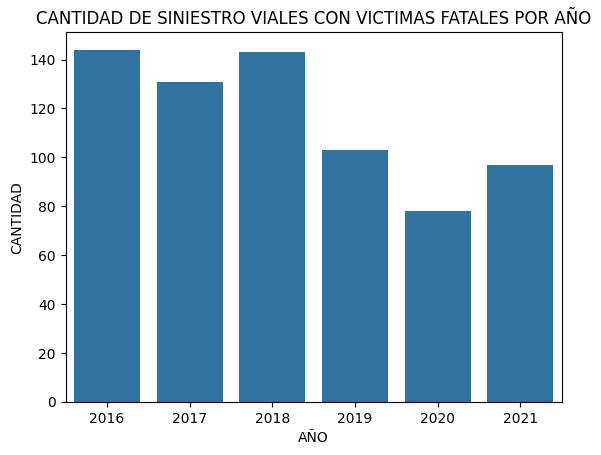

In [8]:
# Extraje el año de la columna 'FECHA'
df_homicidios['AÑO'] = pd.DatetimeIndex(df_homicidios['FECHA']).year

# Conté el número de siniestros viales por año
counts = df_homicidios.groupby('AÑO').size()

# Grafico los datos con seaborn
ax = sns.countplot(x='AÑO', data=df_homicidios)

# Agrego el título al eje y
ax.set_ylabel('CANTIDAD')

# Agrego el título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES CON VICTIMAS FATALES POR AÑO')

# Muestro  el gráfico
plt.show()

En este gráfico de barras me muestra la cantidad de siniestros viales por año. En el año 2016 hubo más de 140 siniestros viales con victimas fatales. En el año 2019 hubo más de 100 siniestros viales con victimas fatales.


Contaré la cantidad de siniestros viales con victimas fatales teniendo en cuenta el tipo de calle 

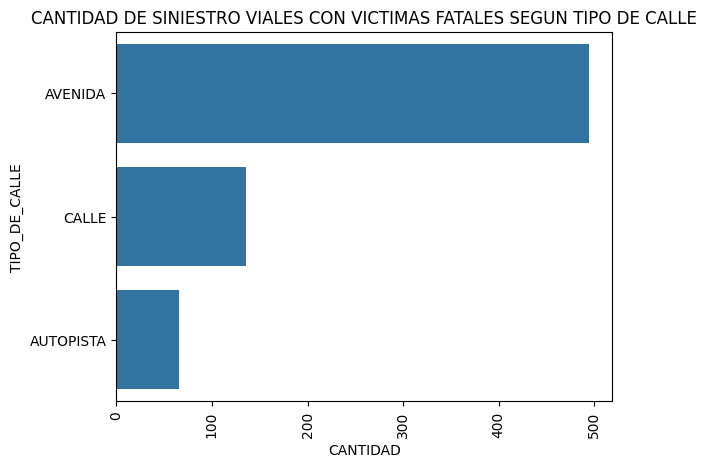

In [9]:
# Contaré el número de veces que aparece cada Lugar del hecho
counts= df_homicidios['TIPO_DE_CALLE'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='TIPO_DE_CALLE', data=df_homicidios)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES CON VICTIMAS FATALES SEGUN TIPO DE CALLE')

# Agrego rotación las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

De este gráfico de barra podemos decir que los siniestros viales con victimas fatales que se produjeron en Autopista son 65 aproximadamente. Y que en los siniestros con victimas fatales producidos en la calle son 135. Y en Avenida se produjeron 493 siniestros viales con victimas fatales aproximadamente.

Voy a realizar el analisis de la cantidad de siniestro viales con victimas fatales por comuna

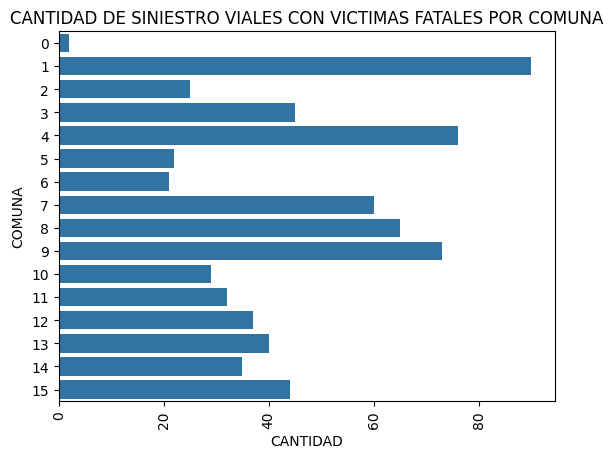

In [10]:
# Contaré el número de veces que aparece cada comuna donde se produjo siniestro viales con victimas fatales
counts= df_homicidios['COMUNA'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='COMUNA', data=df_homicidios)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES CON VICTIMAS FATALES POR COMUNA')

# Agrego rotación a las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

En este gráfico de barras podemos ver que en la COMUNA 1 es en donde se produjeron mayor cantidad de siniestros viales con victimas fatales alrededor de 90 siniestros y en la COMUNA 0 es la comuna en la que se produjo menos cantidad de siniestros viales con victimas fatales aproximadamente 2 siniestros. En las comunas 5 y 6 se produjeron más de 20 siniestros viales con victimas fatales.

Cantidad de siniestros viales con victimas fatales teniendo en cuenta los partipantes en el siniestro

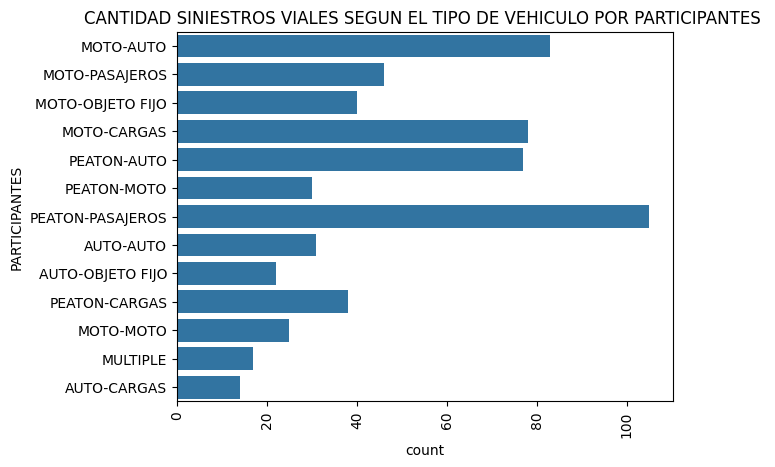

In [12]:
# Contaré el número de veces que aparece cada participante
counts= df_homicidios['PARTICIPANTES'].value_counts()

# Selecciono solo los participantes más importantes
important_participantes = counts[counts > 10]

# Filtro los datos por los participantes más importantes
df_filtered = df_homicidios[df_homicidios['PARTICIPANTES'].isin(important_participantes.index)]

# Grafico los datos con seaborn
ax= sns.countplot(y='PARTICIPANTES', data=df_filtered)

# Agrego título al gráfico
ax.set_title('CANTIDAD SINIESTROS VIALES SEGUN EL TIPO DE VEHICULO POR PARTICIPANTES ')

# Agrego rotación las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

En este gráfico de barra vemos que el tipo de participantes con mayor numero de siniestro viales es Peaton-Pasajeros, mas de 100 siniestros viales. Mientras que el tipo Moto-Auto tiene más de 80 siniestros viales

Voy a realizar el analisis de la cantidad de siniestro viales segun el vehiculo que ocupaba la victima fatal

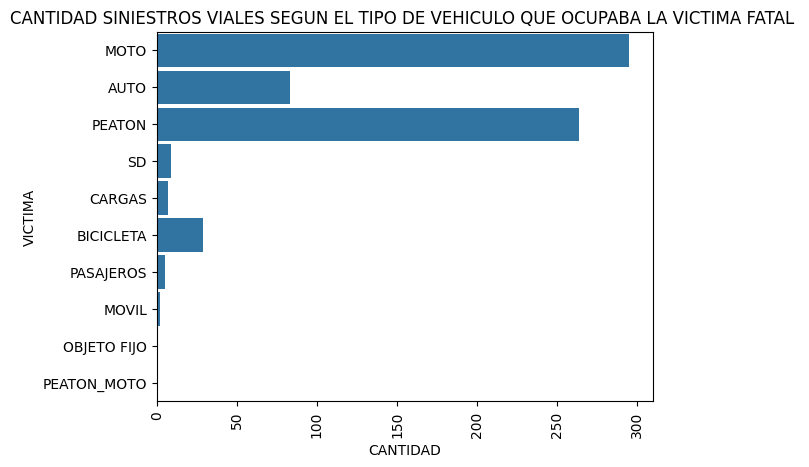

In [14]:
# Contaré el número de veces que aparece el vehículo que ocupaba cada victima
counts= df_homicidios['VICTIMA'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='VICTIMA', data=df_homicidios, width=0.9)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD SINIESTROS VIALES SEGUN EL TIPO DE VEHICULO QUE OCUPABA LA VICTIMA FATAL ')

# Agrego rotación de las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

Este gráfico de barra nos muestra que se produjeron 290 siniestros viales en los que la victima fatal ocupaba una moto. Hubo alrededor de 260 siniestros viales en los que la victima fatal era peatón. Y cerca de 90 siniestros viales en los que la victima fatal ocupaba un auto.

Cantidad de siniestros viales con victimas fatales teniendo en cuenta los ACUSADOS en el siniestro

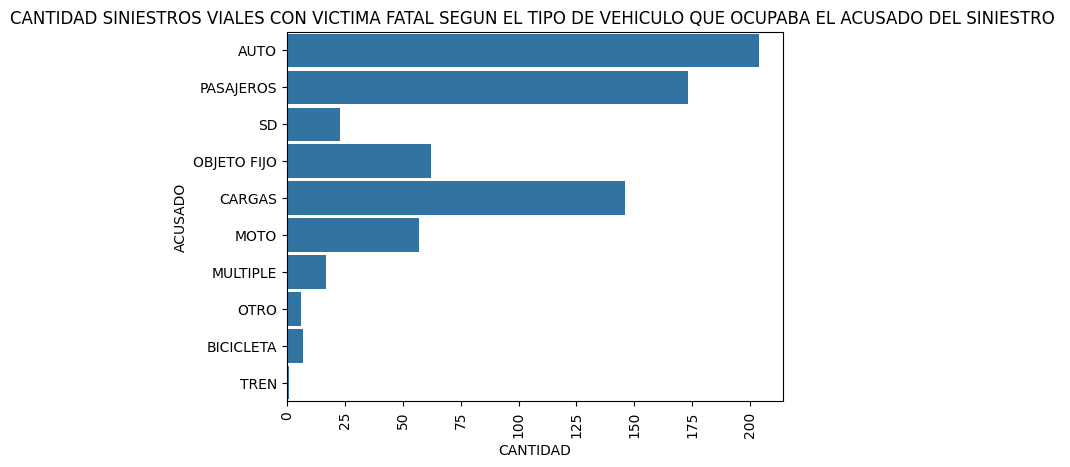

In [15]:
# Contaré el número de veces que aparece el vehiculo que ocupaba el acusado
counts= df_homicidios['ACUSADO'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='ACUSADO', data=df_homicidios, width=0.9)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD SINIESTROS VIALES CON VICTIMA FATAL SEGUN EL TIPO DE VEHICULO QUE OCUPABA EL ACUSADO DEL SINIESTRO ')

# Agrego rotación las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

En este gráfico de barra veo que se produjeron alrededor de 200 siniestro viales con victimas fatales en los que el acusado del hecho ocupaba un auto. Alrededor de 170 siniestros viales con victimas fatales en los que el acusado del hecho era pasajero. Mas de 60 siniestros viales con victimas fatales en los que el acusado ocupaba una moto.

Vamos a realizar un analisis estadístico de las varibles numéricas

COLUMNA N_VICTIMAS

In [16]:
df_homicidios['N_VICTIMAS'].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

La columna N_VICTIMAS del dataset df_homicidios posee 696 datos. El número de victimas promedio en los siniestro viales es 1.030 y la desviación estandar es de 0.17 victimas. El número minimo de victimas en un siniestro es de 1. Y el 25% de los los siniestros viales tienen como valor máximo 1 victima. El 75% de los siniestros viales tienen como valor máximo 1. Y el número maximo de victimas en un siniestro vial es 3.

COLUMNA Altura

In [17]:
df_homicidios['Altura'].describe()

count      129.000000
mean      3336.635659
std       3060.641793
min         30.000000
25%       1359.000000
50%       2551.000000
75%       4500.000000
max      16080.000000
Name: Altura, dtype: float64

La columna Altura indica la altura en la que se produjeron los siniestros viales. Tiene 129 datos. La altura promedio en la que se produjeron siniestros viales es 3336.63. La desviación estandar es de 3060.64.La altura mínima en la que se produjeron siniestros viales es de 30. El 25% de las altura en la que se produjeron siniestros viales tiene un valor máximo de 1359. La altura máxima en la que se produjeron siniestros viales es 16080.


Para analizar la dispersión de datos voy a realizar un histograma por cada columna. 

HISTOGRAMA DE LA COLUMNA N_VICTIMAS

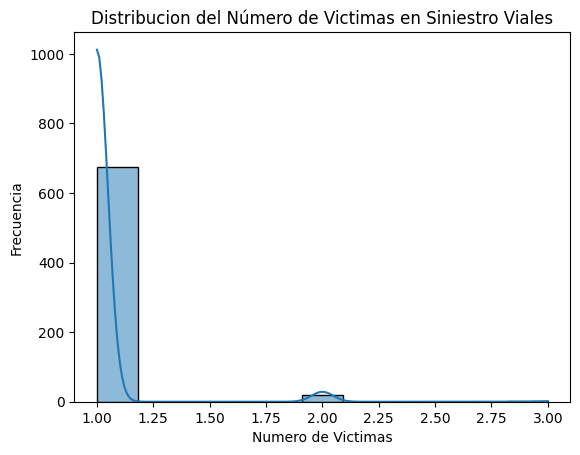

In [18]:
sns.histplot(df_homicidios, x="N_VICTIMAS", kde=True)
plt.xlabel('Numero de Victimas')
plt.ylabel('Frecuencia')
plt.title('Distribucion del Número de Victimas en Siniestro Viales')
plt.show()

In [20]:
#Calcularé la media de N_VICTIMAS
media = df_homicidios['N_VICTIMAS'].mean()
media
# Cabe aclarar que este dato de la media del N_VICTIMAS ya se lo habia mostrado anteriormente cuando se realizo el analisis estadístico con la función describe().  


1.0301724137931034

In [19]:
# Calcular la mediana de la columna 'Price'
mediana = df_homicidios['N_VICTIMAS'].median()
mediana

1.0

En el histograma de vemos que la columna N_VICTIMAS muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

HISTOGRAMA DE LA COLUMNA ALTURA

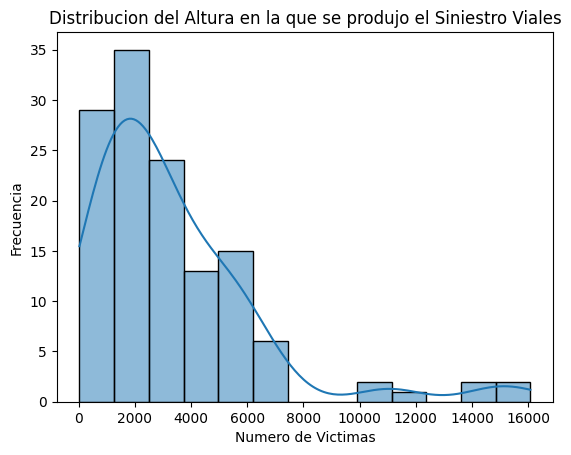

In [21]:
sns.histplot(df_homicidios, x="Altura", kde=True)
plt.xlabel('Numero de Victimas')
plt.ylabel('Frecuencia')
plt.title('Distribucion del Altura en la que se produjo el Siniestro Viales')
plt.show()

In [22]:
#Calcularé la media de Altura
media = df_homicidios['Altura'].mean()
media
# Cabe aclarar que este dato de la media de la Altura ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

3336.6356589147285

In [23]:
# Calcular la mediana de la columna Altura'
mediana = df_homicidios['Altura'].median()
mediana

2551.0

En el histograma de vemos que la columna Altura muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

Diagrama de Caja de la columna N_VICTIMAS

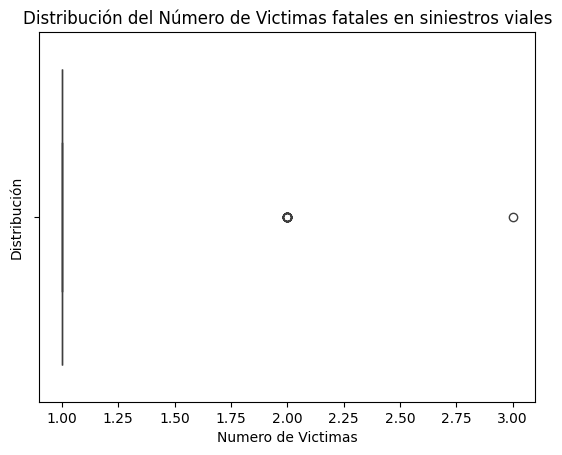

In [24]:
sns.boxplot(x=df_homicidios['N_VICTIMAS'])
plt.xlabel('Numero de Victimas')
plt.ylabel('Distribución')
plt.title('Distribución del Número de Victimas fatales en siniestros viales')
plt.show()


El diagrama de caja muestra la distribución del número de víctimas fatales en siniestros viales. El eje X representa el número de víctimas y el eje Y representa la distribución. El diagrama de caja muestra que hay dos valores atípicos, es decir 2 victimas fatales y en 3 victimas fatales. Los valores atípicos son aquellos que se encuentran fuera del rango intercuartil y se representan como puntos individuales en el gráfico. 

Diagrama de Caja de la Columna Altura

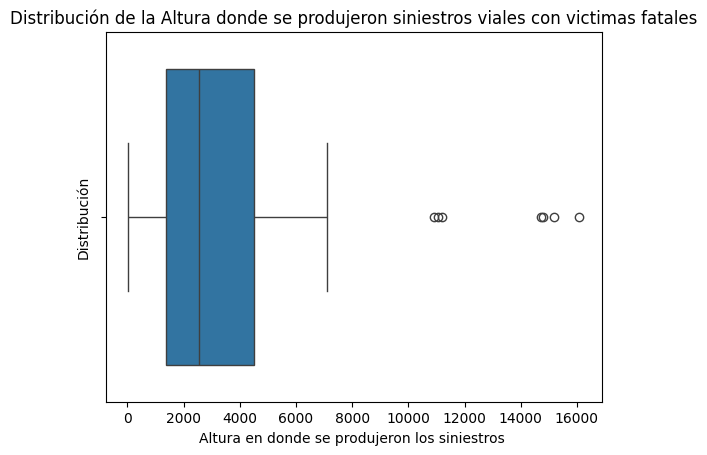

In [25]:
sns.boxplot(x=df_homicidios['Altura'])
plt.xlabel('Altura en donde se produjeron los siniestros ')
plt.ylabel('Distribución')
plt.title('Distribución de la Altura donde se produjeron siniestros viales con victimas fatales')
plt.show()


En el grafico de caja representa la distribución de los datos de la altura donde se produjeron siniestros viales. En este gráfico vemos que la línea que está dentro de caja representa la mediana. Y la mediana al estar más cerca de un extremo de la caja que del otro, representa una distribucion asimetrica. Hay valores atipicos en la altura donde se produjeron los siniestros viales ya que fuera del rango intercuartílico hay valores que se muestran como puntos individuales en el diagrama.

Voy a realizar un gráfico de dispersión para ver la relacion entre el número de victimas y la altura en la que se produjeron los siniestros viales 

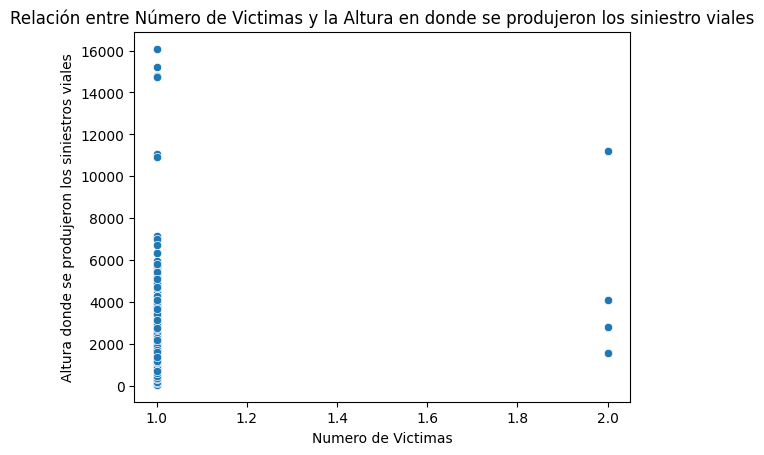

Correlación entre Número de Victimas y Altura donde se produjeron los siniestros viales: 0.09277172523517042


In [26]:
#Gráfico de dispersión
sns.scatterplot(data=df_homicidios, x='N_VICTIMAS', y='Altura')
plt.xlabel('Numero de Victimas')
plt.ylabel('Altura donde se produjeron los siniestros viales')
plt.title('Relación entre Número de Victimas y la Altura en donde se produjeron los siniestro viales')
plt.show()

# Correlación
correlation = df_homicidios['N_VICTIMAS'].corr(df_homicidios['Altura'])
print('Correlación entre Número de Victimas y Altura donde se produjeron los siniestros viales:', correlation)

Este gráfico de dispersión me muestra que existe una relación muy baja entre las variables altura donde fue el siniestro y el número de victimas. El coeficiente es de 0.092

Mapa de Calor de los siniestros por año

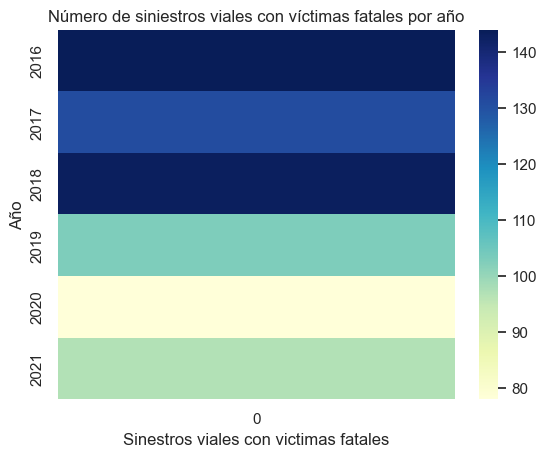

In [89]:
# Agrupo los siniestros viales por año
df_homicidios['AÑO'] = pd.DatetimeIndex(df_homicidios['FECHA']).year
counts = df_homicidios.groupby('AÑO').size()

# Creo un mapa de calor con Seaborn
sns.set()
sns.heatmap(counts.to_frame(), cmap='YlGnBu')
plt.title('Número de siniestros viales con víctimas fatales por año')
plt.xlabel('Sinestros viales con victimas fatales')
plt.ylabel('Año')

# Muestro el mapa de calor
plt.show()

Vamos a crear un dataset df_lesiones a partir del archivo lesiones.csv

In [28]:
df_lesiones = pd.read_csv('../Data/lesiones.csv')

Voy a proceder a ver el dataset df_lesiones

In [29]:
df_lesiones

,Unnamed: 0,id,n_victimas,fecha,hora,franja_hora,direccion_normalizada,comuna,tipo_calle,otra_direccion,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,0,LC-2019-0000179,1,2019-01-01 00:00:00,09:00:00,9,SD,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,1,LC-2019-0000053,1,2019-01-01 00:00:00,01:55:00,1,SD,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,2,LC-2019-0000063,1,2019-01-01 00:00:00,02:00:00,2,SD,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,3,LC-2019-0000079,1,2019-01-01 00:00:00,02:30:00,2,SD,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,4,LC-2019-0000082,4,2019-01-01 00:00:00,04:30:00,4,SD,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,23780,LC-2021-0652849,1,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,AVENIDA,SD,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,23781,LC-2021-0652865,2,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,AVENIDA,SD,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,23782,LC-2021-0652907,1,2021-12-31 00:00:00,20:00:00,20,SD,1,SD,Barrio Padre Carlos Mugica (Villa 31 bis),...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,23783,LC-2021-0652921,1,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,CALLE,SD,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


Eliminaré la columna Unnamed

In [30]:
df_lesiones = df_lesiones.drop(columns=['Unnamed: 0'])

Voy a ver la información del dataset y podré saber si hay nulos o no

In [31]:
df_lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   fecha                  23785 non-null  object 
 3   hora                   23785 non-null  object 
 4   franja_hora            23780 non-null  object 
 5   direccion_normalizada  23732 non-null  object 
 6   comuna                 23616 non-null  object 
 7   tipo_calle             23785 non-null  object 
 8   otra_direccion         23785 non-null  object 
 9   calle                  12867 non-null  object 
 10  altura                 12771 non-null  float64
 11  cruce                  9407 non-null   object 
 12  geocodificacion_CABA   23746 non-null  object 
 13  longitud               23523 non-null  object 
 14  latutid                23523 non-null  object 
 15  vi

Vamos a ver si hay duplicados en el dataset

In [32]:
duplicates = df_lesiones.duplicated(subset=['id'], keep=False)
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_lesiones[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


El dataset df_lesiones nos muestra los datos de los siniestros viales en los que las victimas resultaron lesionadas. Este dataset posee nulos en la columna franja_hora posee 5 nulos, en la columna cruce posee 14378 nulos y en la columna calle tiene 10918 nulos, geocodifor_CABA tiene 39 nulos en la columna longitud tiene 262 nulos y en la columna latitud tiene 262 nulos. El dataset no tiene duplicados respecto a la columna id. Tiene 23785 datos y 24 columnas. Procederé a dellatar las columnas:
- id: Identifica el siniestro vial en donde hubo victima con lesiones y lo identifica a través de un id único
- n_victima: nos indica el número de victimas fatales en el siniestro vial
- fecha: nos indica la fecha en la que ocurrio el siniestro vial
- hora: nos indica la hora con minutos y segundos en el que ocurrio el siniestro vial
- franja_hora: nos indica la hora en el que ocurrio el siniestro vial
- direccion normalizada:nos indica la dirección normalizada en la que ocurrio el siniestro vial
- comuna: nos indica el nro de comuna en la que ocurrio el siniestro vial
- altura: nos indica la altura en la que ocurrio el siniestro vial
- cruce: nos indica entre que calle ocurrio el siniestro vial
- geocodificacion_CABA: nos indica la localización del siniestro vial
- longitud: nos indica la longitud de donde fue el siniestro vial
- latitud: nos indica la latitud de donde fue el siniestro vial
- victima: clase de vehículo que conducia la victima del sinietro vial
- acusado: clase de vehículo en el que se conducia la persona que provoco el siniestro vial 
- Participantes :vehículo involucrado en el siniestro vial
- moto: indica si en el siniestro vial estuvo involucrada una moto
- auto: indica si en el siniestro vial estuvo involucrado una auto
- transporte_publico: indica si en el siniestro vial estuvo involucrado el transporte publico
- camión: indica si en el siniestro vial estuvo involucrado un camión
- ciclista: indica si en el siniestro vial estuvo involucrada un ciclista
- gravedad: indica si el siniestro vial fue grave o no 

Voy a proceder a analizar los variables categoricas más relevantes. 

Contaré la cantidad de siniestros viales con victimas lesionadas por año.

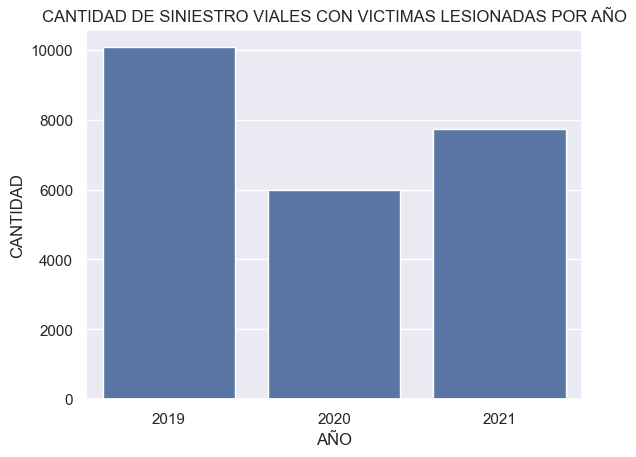

In [33]:
# Extraigo el año de la columna 'FECHA'
df_lesiones['AÑO'] = pd.DatetimeIndex(df_lesiones['fecha']).year

# Cuento el número de siniestros viales por año
counts = df_lesiones.groupby('AÑO').size()

# Grafico los datos con seaborn
ax = sns.countplot(x='AÑO', data=df_lesiones)

# Agrego el título al eje y
ax.set_ylabel('CANTIDAD')

# Agrego el título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES CON VICTIMAS LESIONADAS POR AÑO')

# Muestro  el gráfico
plt.show()

Con este gráfico de barras podemos ver que en el año 2019 hubo 10000 siniestros viales con victimas lesionadas. Y en el año 2020 hubo 6000 siniestros viales con victimas lesionadas y en el año 2021 hubo más de 7700 siniestros viales con victimas lesionadas.

Contaré el número de siniestros viales teniendo en cuenta el Tipo de calle

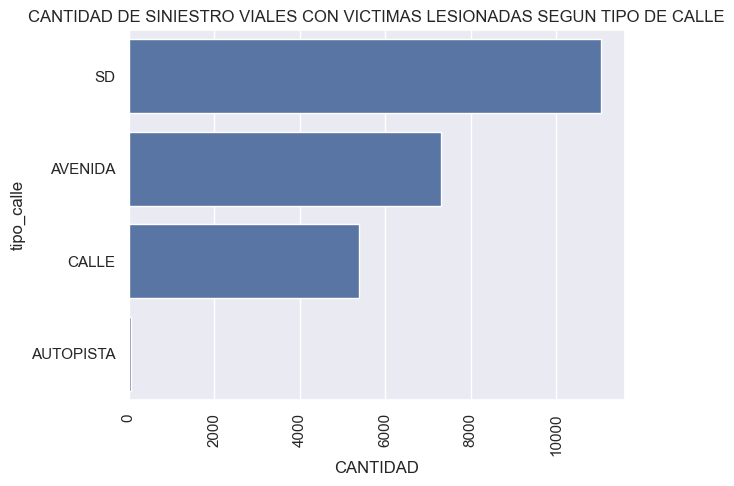

In [34]:
# Contaré el número de veces que aparece cada Lugar del hecho
counts= df_lesiones['tipo_calle'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='tipo_calle', data=df_lesiones)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES CON VICTIMAS LESIONADAS SEGUN TIPO DE CALLE')

# Agrego rotación a las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

Con este gráfico de barras vemos que mas de 10000 siniestros viales con victimas lesionadas no cuenta con el dato de tipo de calle. Más de 7000 siniestros viales se produjeron en avenidas. Y que 5500 siniestros viales aproximadamente se produjeron en la calle.

Contaré el número de siniestros viales teniendo en cuenta el vehículo que ocupaba la victima lesionada

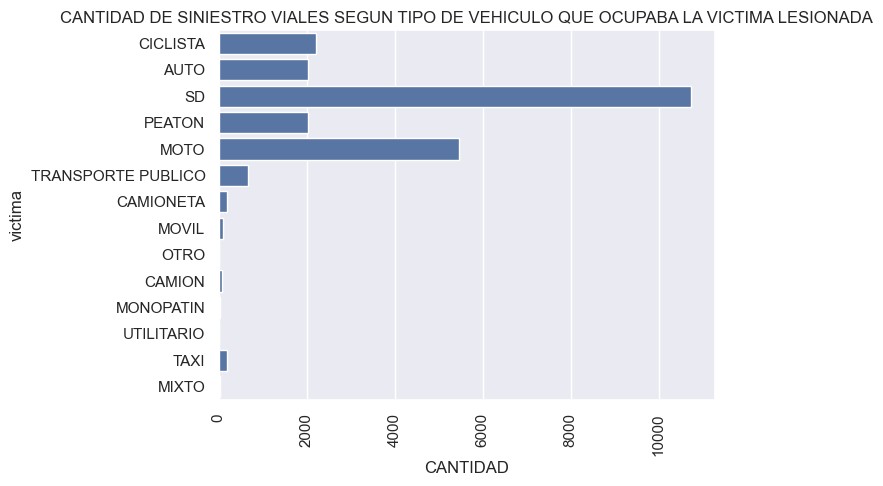

In [35]:
# Contaré el número de veces que aparece cada Lugar del hecho
counts= df_lesiones['victima'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='victima', data=df_lesiones)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES SEGUN TIPO DE VEHICULO QUE OCUPABA LA VICTIMA LESIONADA')

# Agregp rotación a la etiquetas del eje x
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

Este gráfico de barras podemos ver que mas de 10000 siniestros viales no cuenten con el dato del tipo de vehiculo que ocupaba la victima.Más de 5500 de siniestro viales el tipo de vehículo que ocupaba la victima lesionada.

Contaré el número de siniestros viales teniendo en cuenta el vehículo que ocupaba el acusado

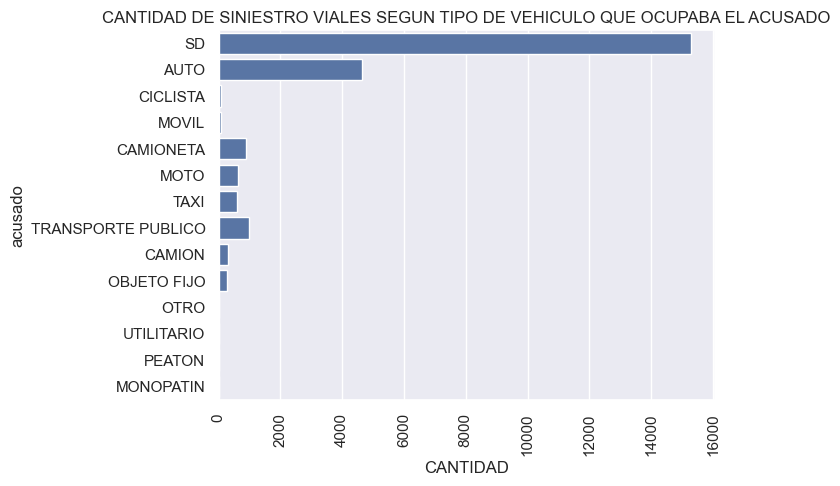

In [36]:
# Contaré el número de veces que aparece cada Lugar del hecho
counts= df_lesiones['acusado'].value_counts()

# Grafico los datos con seaborn
ax= sns.countplot(y='acusado', data=df_lesiones)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')

# Agrego título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES SEGUN TIPO DE VEHICULO QUE OCUPABA EL ACUSADO')

# Agrego rotación a la etiquetas del eje x
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

Según este gráfico de barras no se posee datos de más de 15500 siniestros viales de lesionados. Y se detecto que alrededor de 4200 siniestro viales el vehídulo que ocupaba el acusado era moto.

Contaré el número de siniestros viales teniendo en cuenta el vehículo que ocupaba los participantes

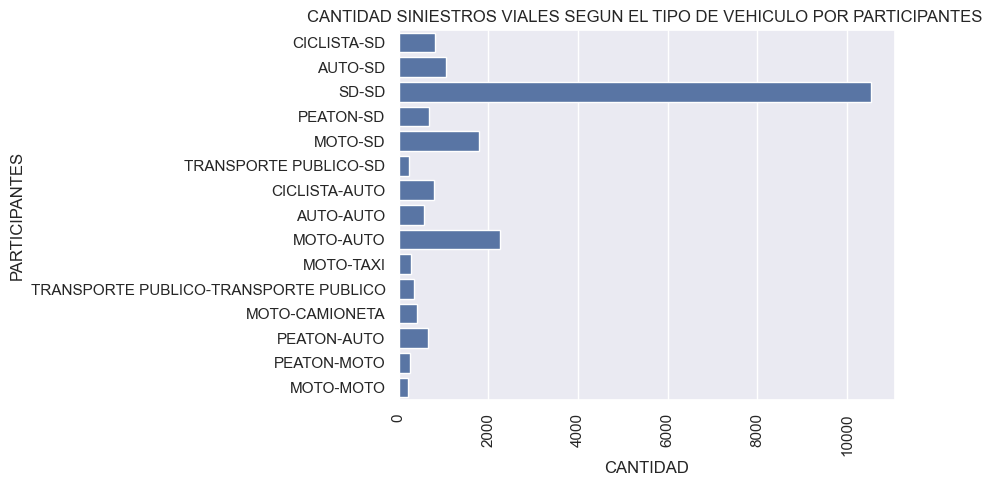

In [58]:
# Contaré el número de veces que aparece cada participante
counts= df_lesiones['participantes'].value_counts()

# Selecciono solo los participantes más importantes
important_participantes = counts[counts > 200]

# Filtro los datos por los géneros más importantes
df_filtered = df_lesiones[df_lesiones['participantes'].isin(important_participantes.index)]

# Grafico los datos con seaborn
ax= sns.countplot(y='participantes', data=df_filtered)

# Agrego título al eje x
ax.set_xlabel('CANTIDAD')
ax.set_ylabel('PARTICIPANTES')

# Agrego título al gráfico
ax.set_title('CANTIDAD SINIESTROS VIALES SEGUN EL TIPO DE VEHICULO POR PARTICIPANTES ')

# Agrego rotación a la etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Muestro el gráfico
plt.show()

En este gráfico podemos ver que no se posee datos de más de 10000 siniestros viales cuyas victimas sufrieron lesiones en el hecho. También podemos ver que hubo más de 2000 siniestros viales en los que los participantes son moto - auto. Hubo 1900 siniestros viales en los que los participantes fueron moto- sd ( sin datos sobre el otro participante del hecho).

Voy a realizar el analisis de la cantidad de siniestro viales segun la comuna donde se produjo el hecho

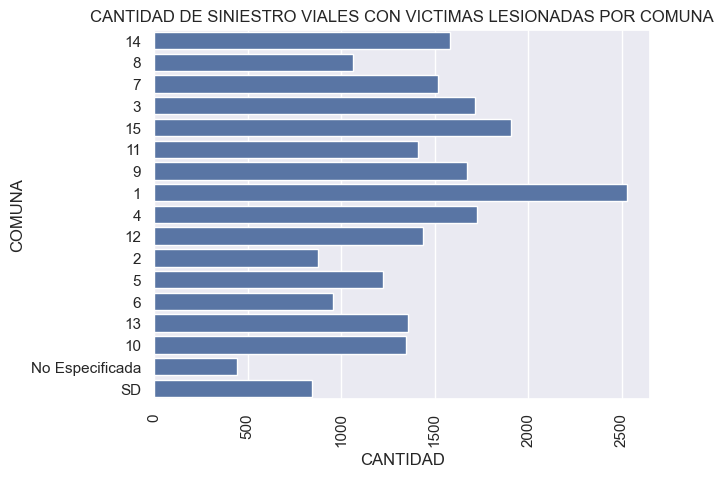

In [61]:
# Contar el número de veces que aparece cada comuna donde se produjo el hecho
counts= df_lesiones['comuna'].value_counts()

# Graficar los datos con seaborn
ax= sns.countplot(y='comuna', data=df_lesiones)

# Agregar título al eje x
ax.set_xlabel('CANTIDAD')

#Agrego titulo al eje y
ax.set_ylabel('COMUNA')

# Agregar título al gráfico
ax.set_title('CANTIDAD DE SINIESTRO VIALES CON VICTIMAS LESIONADAS POR COMUNA')

# Rotar las etiquetas del eje y
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este gráfico podemos ver que en la Comuna 1 se produjeron más de 2500 siniestros viales con victimas lesionadas. En la comuna 14 se produjeron mas de 1500 siniestro viales con victimas lesionadas. También vemos que para más de 800 siniestros viales no tenemos el dato de la comuna en la que se produjo el hecho.

Vamos a realizar el analisis estadístico 

In [63]:
df_lesiones['n_victimas'].describe()

count    23785.000000
mean         1.160563
std          0.551571
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: n_victimas, dtype: float64

En el dataset df_lesiones posee 23785 datos del número de victimas de los siniestros viales. Tiene una media de una victima lesionada por siniestro. La desviación estandar es de 0.55. El minimo de victima en un siniestro vial es de 0 y el máximo de victima en un siniestro vial es de 16. El 25% de los siniestros viales tiene como máximo una victima lesionada. 

In [64]:
df_lesiones['altura'].describe()

count    12771.000000
mean       729.076345
std       1734.515099
min          0.000000
25%          0.000000
50%          0.000000
75%        270.000000
max      17700.000000
Name: altura, dtype: float64

En el dataset df_lesiones posee 12771 datos sobre la altura en la que se produjo el siniestro vial. Tiene una altura media de 729.07. La altura minima es 0. Y la altura maxima es 17700. El 75% de los datos de altura tiene como valor máximo 270.

Histograma de cada columna

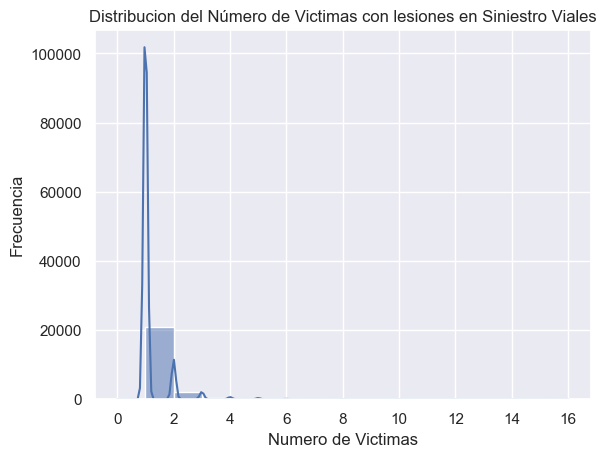

In [65]:
sns.histplot(df_lesiones, x="n_victimas", kde=True)
plt.xlabel('Numero de Victimas')
plt.ylabel('Frecuencia')
plt.title('Distribucion del Número de Victimas con lesiones en Siniestro Viales')
plt.show()

In [66]:
#Calcularé la media de n_victimas
media = df_lesiones['n_victimas'].mean()
media
# Cabe aclarar que este dato de la media de n_victimas ya se lo habia mostrado anteriormente cuando se realizo el analisis estadístico con la función
#describe().  

1.1605633802816901

In [67]:
# Calcular la mediana de la columna 'n_victima'
mediana = df_lesiones['n_victimas'].median()
mediana

1.0

En el histograma de vemos que la columna n_victima muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

Histograma de la altura en la que ocurre los siniestros viales con victimas lesionadas

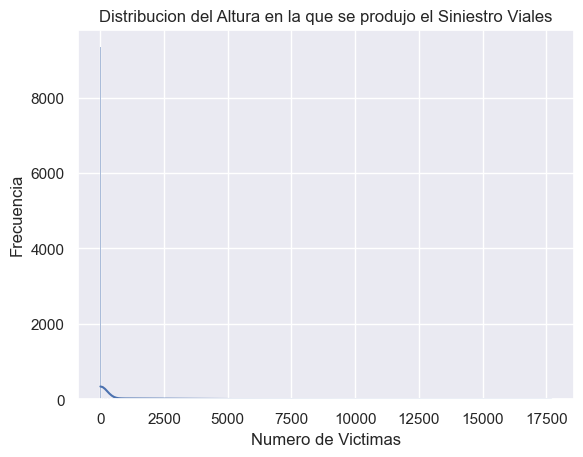

In [68]:
sns.histplot(df_lesiones, x="altura", kde=True)
plt.xlabel('Numero de Victimas')
plt.ylabel('Frecuencia')
plt.title('Distribucion del Altura en la que se produjo el Siniestro Viales')
plt.show()

In [69]:
#Calcularé la media de altura
media = df_lesiones['altura'].mean()
media
# Cabe aclarar que este dato de la media de altura ya se lo habia mostrado anteriormente cuando se realizo el analisis estadístico con la función
#describe()

729.0763448437867

In [70]:
# Calcular la mediana de la columna 'altura'
mediana = df_lesiones['altura'].median()
mediana

0.0

En el histograma de vemos que la columna 'altura' muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

Diagrama de Caja del n_victimas

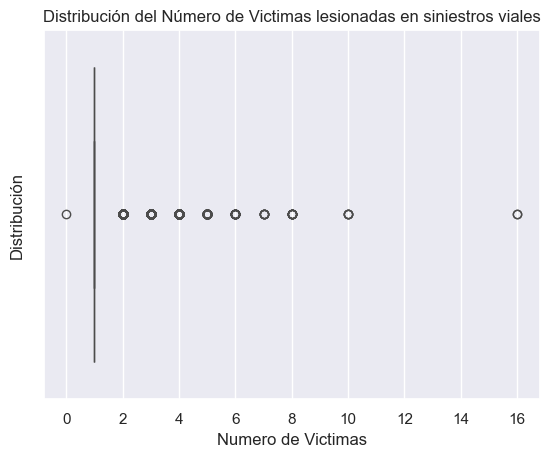

In [71]:
sns.boxplot(x=df_lesiones['n_victimas'])
plt.xlabel('Numero de Victimas')
plt.ylabel('Distribución')
plt.title('Distribución del Número de Victimas lesionadas en siniestros viales')
plt.show()

El diagrama de caja muestra la distribución del número de víctimas lesionadas en siniestros viales. El eje X representa el número de víctimas y el eje Y representa la distribución. El diagrama de caja muestra que hay muchos valores atípicos. Los valores atípicos son aquellos que se encuentran fuera del rango intercuartil y se representan como puntos individuales en el gráfico. 

Diagrama de Caja de la altura en que se produjo el siniestro vial

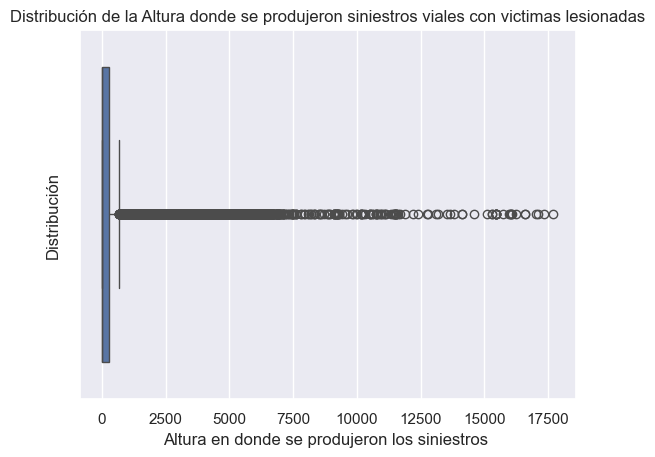

In [72]:
sns.boxplot(x=df_lesiones['altura'])
plt.xlabel('Altura en donde se produjeron los siniestros ')
plt.ylabel('Distribución')
plt.title('Distribución de la Altura donde se produjeron siniestros viales con victimas lesionadas')
plt.show()

En el grafico de caja representa la distribución de los datos de la altura donde se produjeron siniestros viales. Hay muchos valores atipicos en la altura donde se produjeron los siniestros viales ya que fuera del rango intercuartílico hay valores que se muestran como puntos individuales en el diagrama.

Grafico de dispersión para ver la relacion entre el número de victimas y la altura en la que se produjeron los siniestros viales con lesiones

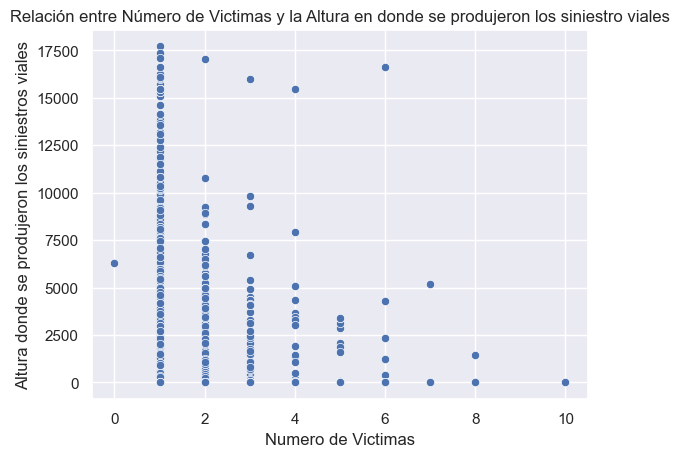

Correlación entre Número de Victimas y Altura donde se produjeron los siniestros viales: 0.001323737186261699


In [74]:
#Gráfico de dispersión
sns.scatterplot(data=df_lesiones, x='n_victimas', y='altura')
plt.xlabel('Numero de Victimas')
plt.ylabel('Altura donde se produjeron los siniestros viales')
plt.title('Relación entre Número de Victimas y la Altura en donde se produjeron los siniestro viales')
plt.show()

# Correlación
correlation = df_lesiones['n_victimas'].corr(df_lesiones['altura'])
print('Correlación entre Número de Victimas y Altura donde se produjeron los siniestros viales:', correlation)

Este gráfico de dispersión me muestra que no existe una relación entre las variables altura donde fue el siniestro y el número de victimas. El coeficiente es de 0.001

Mapa de Calor de los siniestros con victimas lesionadas por año

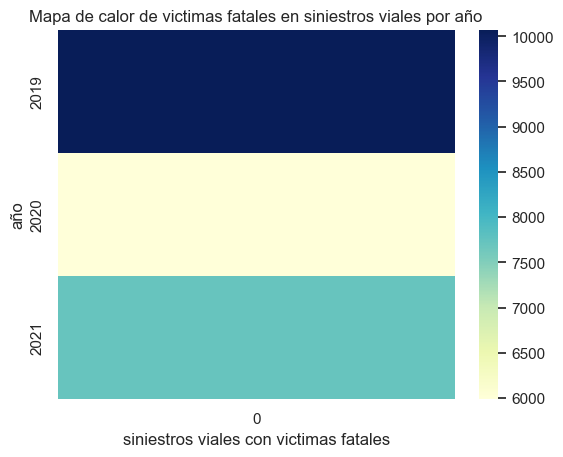

In [88]:
# Agrupo los siniestros viales con victimas lesionadas por año
df_lesiones['año'] = pd.DatetimeIndex(df_lesiones['fecha']).year
counts = df_lesiones.groupby('año').size()

# Creo un mapa de calor con Seaborn
sns.set()
sns.heatmap(counts.to_frame(), cmap='YlGnBu')
plt.title('Mapa de calor de victimas fatales en siniestros viales por año')
plt.ylabel('año')
plt.xlabel ('siniestros viales con victimas fatales')

# Muestro el mapa de calor
plt.show()

Voy a presentar un resumen del EDA. 

In [116]:
import pandas as pd

# Leer el archivo de Excel
df = pd.read_excel('../Data/resumen_EDA.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

df = df.iloc[1:]

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | Caracteristicas                                                                               | df_homicidios                                                                                                       | df_lesiones                                                                                                                                                                                          |
|---:|:----------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  2 | ¿Qué información tiene?                                                                       | Siniestros viales con victimas fatales que se produjeron 